In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("man_city_xg_per_shot.csv")
df

,Date,npxG/Sh For,npxG/Sh Ag
0,2022-08-07,0.11,0.08
1,2022-08-13,0.09,0.04
2,2022-08-21,0.10,0.15
3,2022-08-27,0.13,0.06
4,2022-08-31,0.20,0.08
...,...,...,...
157,2022-04-30,0.13,0.20
158,2022-05-08,0.16,0.12
159,2022-05-11,0.16,0.08
160,2022-05-15,0.05,0.18


In [39]:
df = df.sort_values(by="Date")

df["rolling_xg_per_shot_for"] = df["npxG/Sh For"].rolling(window=10, min_periods=10).mean()
df["rolling_xg_per_shot_ag"] = df["npxG/Sh Ag"].rolling(window=10, min_periods=10).mean()


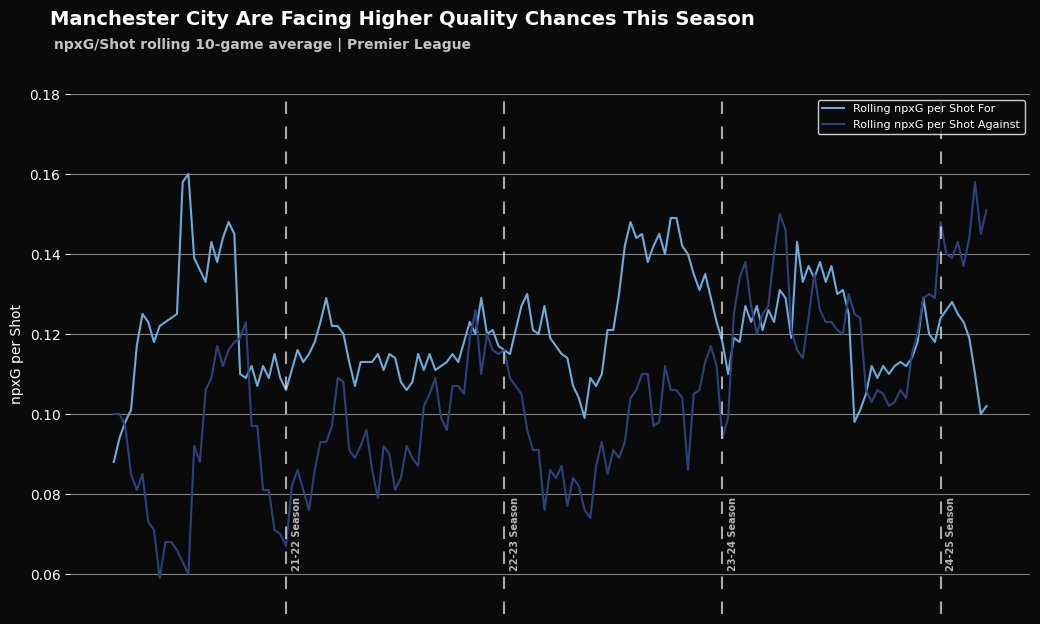

In [90]:
# Apply the dark background style
plt.style.use("dark_background")
background_color = '#0A0A0A'

# Creating the line graph
fig, ax = plt.subplots(figsize=(12,8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.2)

fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plotting the data and trend line
ax.plot(df["Date"], df["rolling_xg_per_shot_for"], label="Rolling npxG per Shot For", color="#6CABDD") 
ax.plot(df["Date"], df["rolling_xg_per_shot_ag"], label="Rolling npxG per Shot Against", color="#2D417F") 
ax.axvline(x=153, color="white", linestyle="--", alpha=.65, dashes=(6,6)) 
ax.axvline(x=39, color="white", linestyle="--", alpha=.65, dashes=(6,6)) 
ax.axvline(x=115, color="white", linestyle="--", alpha=.65,  dashes=(6,6)) 
ax.axvline(x=77, color="white", linestyle="--", alpha=.65, dashes=(6,6)) 

# Adding labels to plot
ax.text(x=154, y=0.07, s="24-25 Season", rotation=90, verticalalignment='center', color='white', 
         fontsize=7, fontdict={"fontweight": "bold"}, alpha=0.7)
ax.text(x=40, y=0.07, s="21-22 Season", rotation=90, verticalalignment='center', color='white', 
         fontsize=7, fontdict={"fontweight": "bold"}, alpha=0.7)
ax.text(x=116, y=0.07, s="23-24 Season", rotation=90, verticalalignment='center', color='white', 
         fontsize=7, fontdict={"fontweight": "bold"}, alpha=0.7)
ax.text(x=78, y=0.07, s="22-23 Season", rotation=90, verticalalignment='center', color='white', 
         fontsize=7, fontdict={"fontweight": "bold"}, alpha=0.7)

# Customizing appearance
sns.despine(left=True, bottom=True)
ax.grid(True, axis='y', color='gray')

# Adjust labels and ticks
ax.set_xlabel("")
ax.set_xticks([])

ax.set_ylabel("npxG per Shot", color="white")

# Titles
ax.set_title("Manchester City Are Facing Higher Quality Chances This Season ", x=0.35, pad=50, fontdict={"fontsize": 14, "fontweight": "bold"})
fig.suptitle("npxG/Shot rolling 10-game average | Premier League", x=0.26, y=.92, size=10, weight="bold", alpha=0.76 )


ax.set_ylim(0.05, 0.18)

ax.legend(
    loc='upper right',           # Position of legend
    frameon=True,                # Add a frame around the legend
    facecolor=background_color,  # Background color matching plot
    edgecolor='white',          # Border color
    labelcolor='white',         # Text color
    fontsize=8                 # Text size
)

plt.show()


            Player   xG
0   Erling Haaland  9.7
1   Bernardo Silva  1.4
2   İlkay Gündoğan  1.3
3  Kevin De Bruyne  1.2
4            Sávio  1.1
5    Mateo Kovačić  0.9
6       Phil Foden  0.8
7       Rico Lewis  0.7
8       Rúben Dias  0.6
9   Joško Gvardiol  0.6


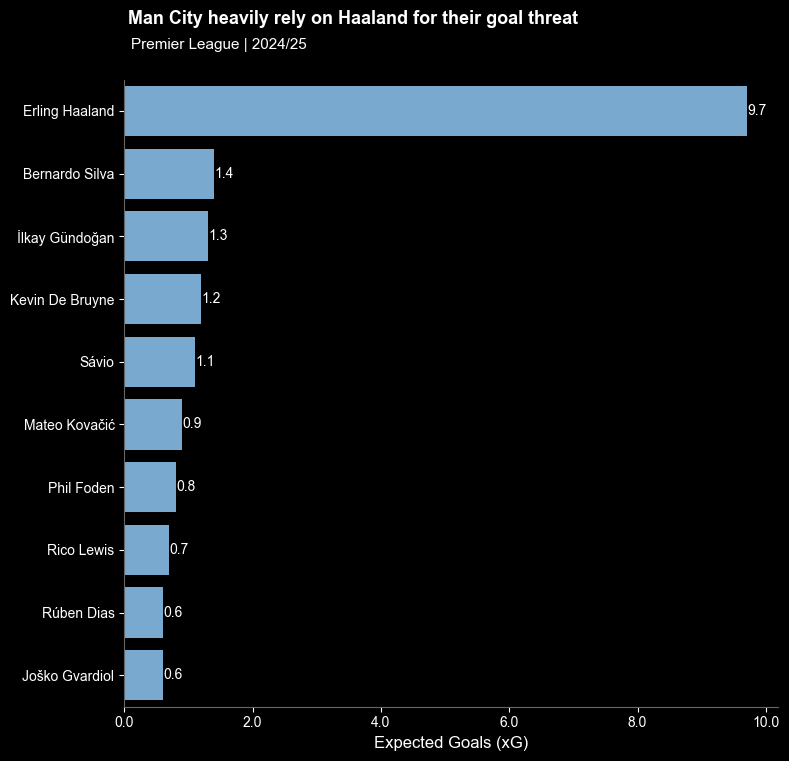

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Style Configuration
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Arial'

# Sort dataframe by high_chance_% in descending order
df = pd.read_csv("man_city_player_xg.csv")
df_sorted = df.sort_values('xG', ascending=False)
high_df = df_sorted.head(10)
print(high_df)

# Create Plot
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=high_df["xG"], y=high_df["Player"], ax=ax, color='#6CABDD')

# Add Value Labels - now in decimal points instead of percentages
for i, v in enumerate(high_df["xG"]):
    ax.text(v + 0.01, i, f'{v:.1f}', va='center', color='white')

# Format Axes - removed percentage formatting
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))

# Customize Spines and Ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#666666')
ax.spines['bottom'].set_color('#666666')
ax.tick_params(colors='#ffffff')

# Add Titles and Labels - updated label to remove percentage reference
plt.xlabel('Expected Goals (xG)', color='white', fontsize=12)
plt.ylabel("")
plt.title("Man City heavily rely on Haaland for their goal threat",
          color='white', fontsize=13, fontdict={"weight":"bold"}, pad=40, x=0.35)
plt.suptitle('Premier League | 2024/25',
            color='white', fontsize=11, x=.28, y=0.91)

# Final Layout and Display
plt.tight_layout()
plt.show()
